Author: Lydia Holley

Email: lholley4@uncc.edu

In [1]:
# import all the needed packages
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


---------------------

# Question 1

(S, T) and (U, V ) form an orthogonal and non-orthogonal coordinate system, respectively, for the same space. Let −→e_s = [Sx, Sy] and −→e_t = [Tx, Ty] as the orthonormal basis for system [S, T]. Let −→e_u = [Ux, Uy] and −→e_v = [Vx, Vy] be unit vectors and form a basis for system [U, V ]. Figure 1 depicts the coordinate systems, with X − Y forming the original coordinate system, S − T forming the orthogonal one, and U − V forming the non-orthogonal one.

###### Let −→q = [qx, qy] be an arbitrary vector. Compute:

1). the coordinate of −→q in the space of [S, T].

2). the coordinate of −→q in the space of [U, V ].

3). Can you explain why orthogonal basis makes things easier to handle?

1).
[S,T] is an orthonormal system, this means that the dot product will result in any vector in that system being able to be simply the dot product with the basis. The dot product results in v1 · v1 = 1 and vi · v1 = 0 for all vectors in the system. So, the coordinate of −→q in the space of [S, T] is simply:

−→q • e_s = (qx * Sx) + (qy * Sy)

−→q • e_t = (qy * Tx) + (qy * Ty)

= [−→q • S , −→q • T]

2).
[U,V] is not an orthonormal system, this means the method of finding the coordinates is more complicated. v1 · v1 =/= 1 and vi · v1 =/= 0 for all vectors in the system. so: 

−→q = c1U + c2V; which gives us:

−→q • e_u = c1(U • U) + c2(U • V)

−→q • e_v = c1(V • U) + c2(V • V)

the above does not simplify easily as an orthonormal basis would due to the dot products not being 1 for U•U and V•V and 0 for U•V.

3). 
An orthogonal basis makes things easier to handle because the dot product of the basis vectors is simply 0. This makes the computational work much simpler because most of the dot products cancel out, leaving only the one dot product to deal with. The same is not true for non orthogonal spaces, making the computation more difficult an complicated. The more dimensions, the more complicated this becomes as well.

----------------

# Question 2

2. Write your own class in Python to perform PCA analysis. Require that your input data follow the format where rows are samples and columns are variables. Your function should do the following:

(1). Do mean-centering.

(2). Compute the covariance matrix using numpy.cov().

(3). Perform eigen-decomposition using numpy.linalg.eig().

(4). Project the data onto the principal component axes.

(5). Return the variance and percent variance that each PC explains, all of the scores, and loadings.

In [2]:
# create the PCA class for question 2
class myPCA:
    
    def __init__(self, data, num_components):
        # two inputs, one is the data and the other is the number of PCAs desired
        # I found this to be the easiest way to call the class

        self.data = data
        self.num_components = num_components
        
        # these following values need to be initialized so they can be stored as part of the class
        # this makes it possible to call on these values even from different class methods
        self.eigenvectors = None
        self.eigenvalues = None
        self.data_mean = None
        self.new_data = None
        self.projected = None
        self.pcnt_var = None
        self.variance = None
        
    def my_fit(self):
        # do mean centering
        self.data_mean = np.mean(self.data,axis=0)
        self.new_data = self.data - self.data_mean
        
        # compute covariance matrix using numpy.cov()
        # for np.cov the columns need to be samples, so transpose the data
        cov_matrix = np.cov(self.new_data.transpose()) 
        
        # perform eigendecomposition using np.linalg.eig()
        eigenvalues,eigenvectors = np.linalg.eigh(cov_matrix)
        
        # sort eigenvectors and eigenvalues for the PCA
        eigenvectors = eigenvectors.transpose()
        index = np.argsort(eigenvalues)[::-1]
        eigenvalues_sorted = eigenvalues[index]
        eigenvectors_sorted = eigenvectors[index]
        
        #store first num_components eigenvectors and eigenvalues
        self.eigenvectors = eigenvectors_sorted[0:self.num_components]
        self.eigenvalues = eigenvalues_sorted[0:self.num_components]
        
    def my_transform(self):
        #project the data onto the principle components of the number of components
        self.projected = np.dot(self.new_data,self.eigenvectors.transpose())
        return self.projected
    
    def my_fit_transform(self):
        # combine fit and transform methods to be able to do all at once
        # do mean centering
        self.data_mean = np.mean(self.data,axis=0)
        self.new_data = self.data - self.data_mean
        
        # compute covariance matrix using numpy.cov()
        #row = 1 sample, column = feature
        cov_matrix = np.cov(self.new_data.transpose()) #this function needs column to be a sample
        
        # perform eigendecomposition
        eigenvalues,eigenvectors = np.linalg.eigh(cov_matrix)
        
        # sort eigenvectors for the PCA
        eigenvectors = eigenvectors.transpose()
        index = np.argsort(eigenvalues)[::-1]
        eigenvalues_sorted = eigenvalues[index]
        eigenvectors_sorted = eigenvectors[index]
        
        #store first n eigenvectors and eigenvalues
        self.eigenvectors = eigenvectors_sorted[0:self.num_components]
        self.eigenvalues = eigenvalues_sorted[0:self.num_components]
        
        #project our data
        self.projected = np.dot(self.new_data,self.eigenvectors.transpose())
        return self.projected
    
    def my_var(self):
        # return the variance
        self.variance = np.var(self.projected, axis=0)
        return f'Variance Explained: {list(self.variance)}'
    
    def my_pct_var(self):
        # return the percent variance explained by each PC by finding percent of total eigenvalues
        total_eigenvalues = sum(self.eigenvalues)
        pct_variance = []
        for i in self.eigenvalues:
            pctVar = (i/total_eigenvalues)*100
            pct_variance.append(pctVar)
            
        self.pcnt_var = pct_variance           
        return f'Percent Variance Explained: {pct_variance}'
    
    def my_scores(self):
        # return the scores, which is the data projected onto the principle components
        return self.projected
    
    def my_loadings(self):
        # return the loadings, which is the eigenvectors
        return self.eigenvectors

---------

# Question 3

3. Apply your own PCA function to the dataset “Homework 2 dataset prob3.csv”. In this dataset, columns correspond to variables.

    a. Plot the scores plot.
        You can see a clear separation of the data from the scores plot.
    
    b. Do you see a clear separation of the raw data?
        Yes, there is a clear separation. You can see the visual division between pink and aquamarine.
    
    c. Can you still separate them after you project your raw data onto your first principal component?
        No, you cannot still separate them after you project the data onto the first principal component.
    
    d. What message can you get from this observation?
        This observation illustrates how PCA is an analysis of variation, not necessarily discrimination between different classifications of data. If you look at PC2 you can see the differentiation between data, but there is less overall variability. That's why PC1 is the first component when sorted.
    
    e. What is the variance of the projections on PC1 and PC2. What is the relationship between these variances and the eigenvalues of your covariance matrix?
    
    PC1: 
        variance: 158.35
        percent variance according to np.var: 96.9
        eigenvalue: 161.04
        percent variance according to np.eigenvalues: 96.9
    PC2: 
        variance: 5.039
        percent variance according to np.var: 3.08
        eigenvalue: 5.125
        percent variance according to eigenvalues: 3.08
        
    relationship: 
        The variances are similar in magnitude to the eigenvalues of the covariance matrix. 
        Taking the percentage of totals for variance and eigenvalues gives equal percents.
        This makes sense because of how variance and eigenvalues are related.
        PC1 explains majority of the variation in the data.
        

In [1]:
#read in the dataset
data = pd.read_csv('Homework_2_dataset_prob3.csv')
data = data.to_numpy()

# check that all aspects of the class are working 
# can change what variable is being shown at the end to check it
num_components = min(data.shape[0],data.shape[1])

pca = myPCA(data,num_components)
pcafit = pca.my_fit()
projected = pca.my_transform()
pctVar = pca.my_pct_var()
var = pca.my_var()
loadings = pca.my_loadings()
scores = pca.my_scores()
var

NameError: name 'pd' is not defined

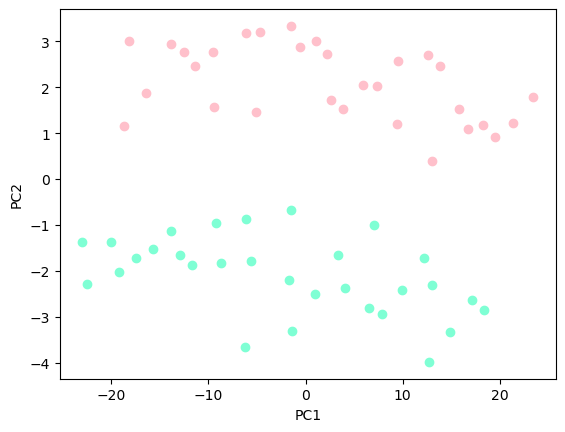

In [4]:
### a. Plot the scores plot.

y1 = scores[:,0]
y2 = scores[:,1]

plt.scatter(y1[:30], y2[:30], color='aquamarine')
plt.scatter(y1[30:], y2[30:], color='pink')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

/var/folders/n6/gbphvvd12sq8410bcnt0m5pc0000gn/T/ipykernel_51347/3568095717.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


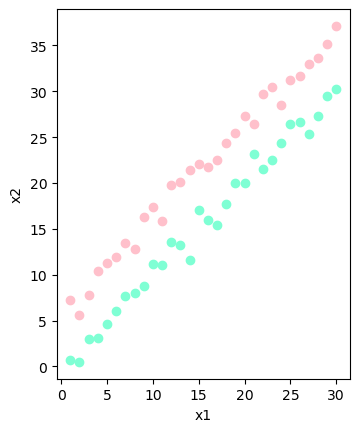

In [5]:
## visualize raw data
## b. Do you see a clear separation of the raw data?

#label x1 as the first column and x2 as the second column
x1 = data[:,0]
x2 = data[:,1]

#plot the figure
#make the two sets of data different colors
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x1[:30], x2[:30], color='aquamarine')
ax.scatter(x1[30:], x2[30:], color='pink')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_aspect('equal','box')
fig.show()

In [6]:
# get data for just one principle component
pcaQ3_3 = myPCA(data,1)
pcafitQ3_3 = pcaQ3_3.my_fit()
projectedQ3_3 = pcaQ3_3.my_transform()
pctVarQ3_3 = pcaQ3_3.my_pct_var()
varQ3_3 = pcaQ3_3.my_var()
loadingsQ3_3 = pcaQ3_3.my_loadings()
scoresQ3_3 = pcaQ3_3.my_scores()
# projectedQ3_3 is the variable for PC1 plot

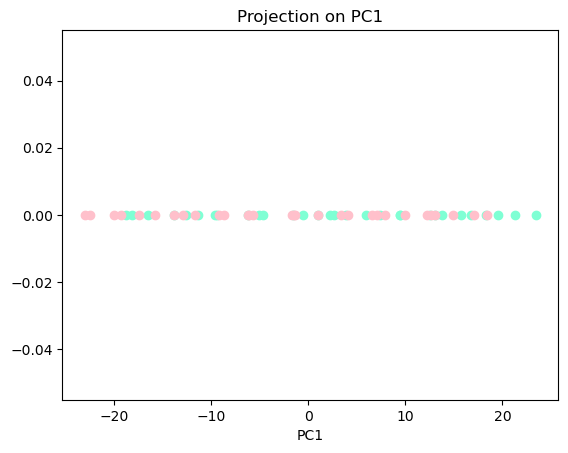

In [7]:
# plotting the data projected on PC1
#use np.zeros_like() to make every point plotted on the x axis

plt.figure()
plt.scatter(projectedQ3_3[30:], np.zeros_like(projectedQ3_3)[30:], color = 'aquamarine')
plt.scatter(projectedQ3_3[:30], np.zeros_like(projectedQ3_3)[:30], color = 'pink')
plt.xlabel('PC1')
plt.title('Projection on PC1')
plt.show()

In [8]:
#e. What is the variance of the projections on PC1 and PC2. 
#    What is the relationship between these variances and the eigenvalues of your covariance matrix?
print(var)
print(pctVar)
print(pca.eigenvalues)

Variance Explained: [158.35671176837863, 5.039862489564208]
Percent Variance Explained: [96.9155641650062, 3.084435834993781]
[161.04072383   5.12528389]


-------------------------------

# Question 4

4. Apply your own PCA function to the dataset “Homework 2 dataset prob4.csv”. In this dataset, rows correspond to different variables and columns correspond to different samples. You will need to transpose it before PCA analysis because your own PCA function requires columns to be variables. Plot the scree plot for PC1 and PC2 and indicate the percentage of variance that PC1 and PC2 explains respectively. Also plot the scores plot and loadings plot.

In [9]:
#read in the dataset

dataQ4 = pd.read_csv('Homework_2_dataset_prob4.csv', index_col=0)
dataQ4 = dataQ4.transpose()
dataQ4 = dataQ4.to_numpy()

In [10]:
# run the Q4 data through the PCA class
num_components = min(dataQ4.shape[0],dataQ4.shape[1])

pcaQ4 = myPCA(dataQ4, num_components)
projectedQ4 = pcaQ4.my_fit_transform()
pctVarQ4 = pcaQ4.my_pct_var()
varQ4 = pcaQ4.my_var()
loadingsQ4 = pcaQ4.my_loadings()
scoresQ4 = pcaQ4.my_scores()

/var/folders/n6/gbphvvd12sq8410bcnt0m5pc0000gn/T/ipykernel_51347/7738363.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


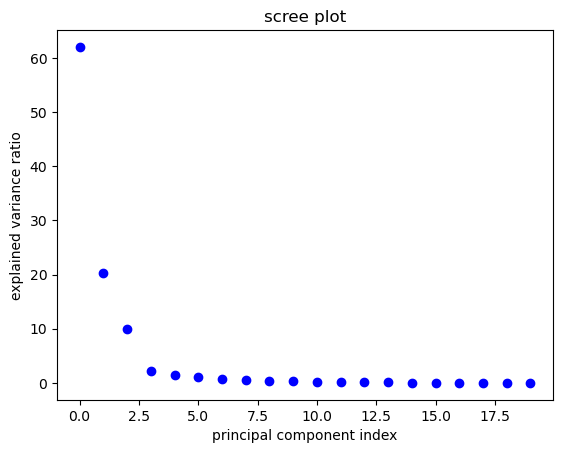

In [11]:
# plot the scree plot based on ratio

fig, ax = plt.subplots()
ax.scatter(range(len(pcaQ4.pcnt_var)),
           pcaQ4.pcnt_var,
           color='blue')
ax.set_xlabel("principal component index")
ax.set_ylabel("explained variance ratio")
ax.set_title("scree plot")
fig.show()

/var/folders/n6/gbphvvd12sq8410bcnt0m5pc0000gn/T/ipykernel_51347/1170041720.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


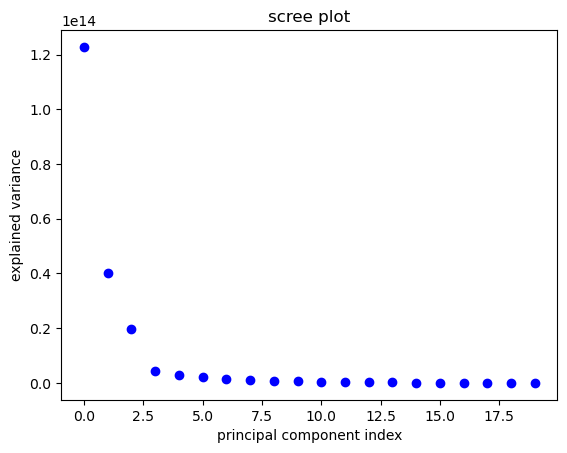

In [12]:
# plot the scree plot based on variance explained

fig, ax = plt.subplots()
ax.scatter(range(len(pcaQ4.variance)),
           pcaQ4.variance,
           color='blue')
ax.set_xlabel("principal component index")
ax.set_ylabel("explained variance")
ax.set_title("scree plot")
fig.show()

/var/folders/n6/gbphvvd12sq8410bcnt0m5pc0000gn/T/ipykernel_51347/1057007546.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


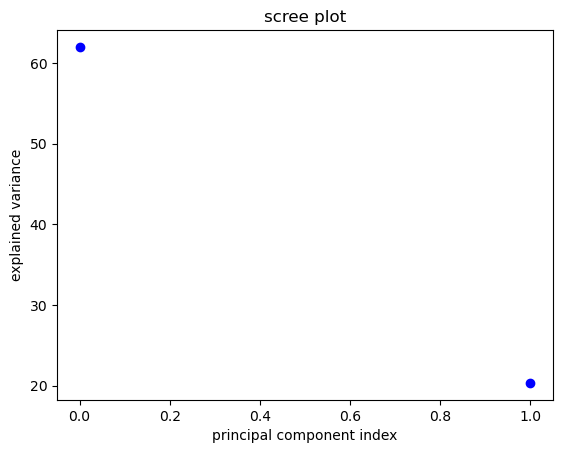

In [13]:
# plot the scree plot based on PC1 and PC2 percent variances only

fig, ax = plt.subplots()
ax.scatter(range(len(pcaQ4.pcnt_var[0:2])),
           pcaQ4.pcnt_var[0:2],
           color='blue')
ax.set_xlabel("principal component index")
ax.set_ylabel("explained variance")
ax.set_title("scree plot")
fig.show()

In [14]:
# indicate the percentage of variance that PC1 and PC2 explains respectively
pcaQ4.pcnt_var[0:2]

# percent variance explained by PC1 is 62.017
# percent variance explained by PC2 is 20.325

[62.01722085382494, 20.325488636553754]

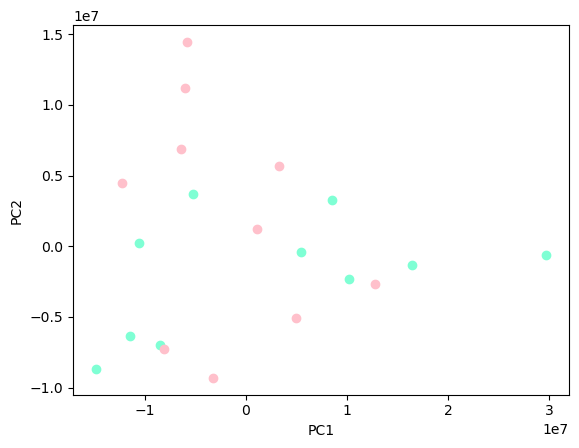

In [15]:
# plot the scores plot

y1Q4 = scoresQ4[:,0]
y2Q4 = scoresQ4[:,1]

plt.scatter(y1Q4[:10], y2Q4[:10], color='aquamarine')
plt.scatter(y1Q4[10:], y2Q4[10:], color='pink')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

/var/folders/n6/gbphvvd12sq8410bcnt0m5pc0000gn/T/ipykernel_51347/1838525271.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


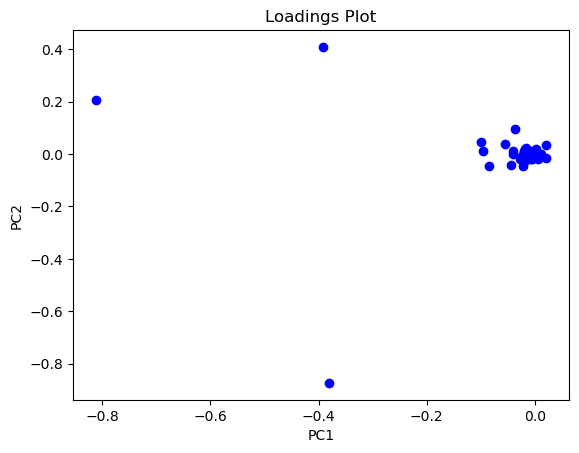

In [17]:
# plot the loadings plot

fig, ax = plt.subplots()
ax.scatter(pcaQ4.eigenvectors[0, :], pcaQ4.eigenvectors[1, :],
           color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Loadings Plot')
fig.show()